# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
import time
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Movies Data**

In [ ]:
from bs4 import BeautifulSoup
import requests

# Specifying the URL from which movies related data will be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# Adding headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
}

# Sending an HTTP GET request to the URL with headers
response = requests.get(url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup = BeautifulSoup(response.text, 'html.parser')

# Printing the prettified HTML content
print(soup.prettify())


<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Scrapping Movie Title**

In [ ]:
# Movie title

movie_title_list=[]# List to store all movie title

# Extracting all movie titles from  tag and storing them in movie_titles
movie_titles = soup.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each movie title from movie_titles and storing in movie_title_list
for movie_title in movie_titles:

    # Extract the 'href' attribute value, which contains the movie title
    data_id_value = movie_title['href']

    # Removing the '/in/movie/' prefix to get the clean movie title
    data_id_value = data_id_value.replace("/in/movie/","")

    # Converting the movie title to uppercase and appending to the list
    movie_title_list.append(data_id_value.upper())
movie_title_list

['UNTITLED-SHAHID-KAPOOR-KRITI-SANON-FILM',
 'PREMALU',
 'HANU-MAN',
 'ARTICLE-370',
 'ANATOMIE-DUNE-CHUTE',
 'OPPENHEIMER',
 'DUNE-PART-TWO',
 'THE-CREW-2024',
 'MANJUMMEL-BOYS',
 'FIGHTER-2022',
 'ANIMAL-2022',
 'ANYONE-BUT-YOU',
 'AMAR-SINGH-CHAMKILA',
 'LAAPATAA-LADIES',
 'DUNE-2021',
 'GODZILLA-X-KONG-THE-NEW-EMPIRE',
 '12TH-FAIL',
 'BRAMAYUGAM',
 'POOR-THINGS',
 'BLACK-MAGIC-2024',
 'MONKEY-MAN',
 'GAAMI',
 'KUNG-FU-PANDA-4',
 'ROAD-HOUSE-2024',
 'SAM-BAHADUR',
 'MADAME-WEB',
 'KUNG-FU-PANDA',
 'THE-BEEKEEPER-2024',
 'DJ-TILLU',
 'TILLU-SQUARE',
 '365-DAYS',
 'SALAAR',
 'GODZILLA-VS-KONG',
 'FAMILY-STAR',
 'AADUJEEVITHAM',
 'MADGAON-EXPRESS',
 'LOVER-2024',
 'MERRY-CHRISTMAS-2024',
 'OM-BHEEM-BUSH',
 'THE-KERALA-STORY',
 'AQUAMAN-AND-THE-LOST-KINGDOM',
 '777-CHARLIE',
 'KAMPON',
 'BADE-MIYAN-CHOTE-MIYAN-2023',
 'JOKER-2019',
 'HARRY-POTTER-AND-THE-PHILOSOPHERS-STONE',
 'AATTAM',
 'YODHA-2022',
 'CHAARI-111',
 'SHE-SAID',
 'ARGYLLE',
 'MURDER-MUBARAK',
 'EAGLE-2024',
 'JORAM',
 'T

## **Fetching Movie URL's**

In [ ]:
# Movie url

movie_url_list=[] # List to store all movie urls

# For every movie title present in movies_title_list , Finding their url
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    movie_url_list.append(absolute_url)
print(movie_url_list)

['https://www.justwatch.com/in/movie/UNTITLED-SHAHID-KAPOOR-KRITI-SANON-FILM', 'https://www.justwatch.com/in/movie/PREMALU', 'https://www.justwatch.com/in/movie/HANU-MAN', 'https://www.justwatch.com/in/movie/ARTICLE-370', 'https://www.justwatch.com/in/movie/ANATOMIE-DUNE-CHUTE', 'https://www.justwatch.com/in/movie/OPPENHEIMER', 'https://www.justwatch.com/in/movie/DUNE-PART-TWO', 'https://www.justwatch.com/in/movie/THE-CREW-2024', 'https://www.justwatch.com/in/movie/MANJUMMEL-BOYS', 'https://www.justwatch.com/in/movie/FIGHTER-2022', 'https://www.justwatch.com/in/movie/ANIMAL-2022', 'https://www.justwatch.com/in/movie/ANYONE-BUT-YOU', 'https://www.justwatch.com/in/movie/AMAR-SINGH-CHAMKILA', 'https://www.justwatch.com/in/movie/LAAPATAA-LADIES', 'https://www.justwatch.com/in/movie/DUNE-2021', 'https://www.justwatch.com/in/movie/GODZILLA-X-KONG-THE-NEW-EMPIRE', 'https://www.justwatch.com/in/movie/12TH-FAIL', 'https://www.justwatch.com/in/movie/BRAMAYUGAM', 'https://www.justwatch.com/in/mov

## **Scrapping release Year**

In [ ]:

# Assuming movie_title_list is a list of movie titles
movie_release_year_list = []

for movie in movie_title_list:
    # Replace spaces with hyphens for the URL
    movie = movie.replace(' ', '-')
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie

    # Sending an HTTP GET request
    response_ry = requests.get(absolute_url)

    # Parsing HTML content with Beautiful Soup
    soup_ry = BeautifulSoup(response_ry.text, 'html.parser')
    movie_release_year_element = soup_ry.find('span', class_='text-muted')

    # Check if the element is found
    if movie_release_year_element:
        movie_release_year = movie_release_year_element.text.strip()
        movie_release_year = movie_release_year.replace("(", "")
        movie_release_year = movie_release_year.replace(")", "")
        movie_release_year_list.append(movie_release_year)
    else:
        # Handle the case where the release year is not found
        movie_release_year_list.append('Release year not found')

print(movie_release_year_list)


['2024', '2024', '2024', '2024', '2023', '2023', '2024', '2024', '2024', '2024', '2023', '2023', '2024', '2024', '2021', '2024', '2023', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', '2020', '2023', '2021', '2024', '2024', '2024', '2024', '2024', '2024', '2023', '2023', '2022', '2023', '2024', '2019', '2001', '2024', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found',

## **Scrapping Genres**

In [ ]:
from bs4 import BeautifulSoup
import requests
import time  # Import time module for introducing delay

# Assuming movie_title_list is a list of movie titles
movie_genre_list = []

for movie in movie_title_list:
    # Replace spaces with hyphens for the URL
    movie_formatted = movie.replace(' ', '-')
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie_formatted

    try:
        # Sending an HTTP GET request
        response_g = requests.get(absolute_url)
        response_g.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code

        # Parsing HTML content with Beautiful Soup
        soup = BeautifulSoup(response_g.text, 'html.parser')

        # Selecting only those h3 whose heading is genres
        h3_element = soup.find('h3', string='Genres')

        if h3_element:
            # Check if the next sibling is a div with class "detail-infos__value"
            div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

            if div_element:
                # Extracting all genres from the div element
                genres = div_element.text.strip().split(',')
                movie_genre_list.append(genres)
            else:
                movie_genre_list.append(["Genre Not Listed"])
        else:
            movie_genre_list.append(["Genre Not Listed"])

        # Introduce a delay to avoid overwhelming the server
        time.sleep(2)  # Sleep for 2 seconds between requests
    except requests.exceptions.HTTPError as e:
        # Handle any HTTP errors that occur during the request
        movie_genre_list.append(["HTTP Error: " + str(e)])
    except Exception as e:
        # Handle any other exceptions that occur
        movie_genre_list.append(["Error: " + str(e)])

print(movie_genre_list)


[['Science-Fiction', ' Comedy', ' Drama', ' Romance'], ['Comedy', ' Romance'], ['Fantasy', ' Action & Adventure', ' Comedy', ' Science-Fiction'], ['Action & Adventure', ' Drama', ' Mystery & Thriller'], ['Mystery & Thriller', ' Crime', ' Drama'], ['Drama', ' History'], ['Action & Adventure', ' Science-Fiction', ' Drama'], ['Drama', ' Comedy'], ['Mystery & Thriller', ' Action & Adventure', ' Drama'], ['War & Military', ' Action & Adventure', ' Mystery & Thriller'], ['Action & Adventure', ' Crime', ' Drama', ' Mystery & Thriller'], ['Comedy', ' Romance'], ['Music & Musical', ' Romance', ' Drama'], ['Comedy', ' Drama', ' Action & Adventure'], ['Action & Adventure', ' Science-Fiction', ' Drama'], ['Action & Adventure', ' Science-Fiction', ' Mystery & Thriller'], ['Drama'], ['Horror', ' Mystery & Thriller'], ['Science-Fiction', ' Comedy', ' Drama', ' Romance'], ['Drama', ' Horror', ' Mystery & Thriller'], ['Mystery & Thriller', ' Crime', ' Action & Adventure'], ['Science-Fiction', ' Fantasy

## **Scrapping IMBD Rating**

In [ ]:
from bs4 import BeautifulSoup
import requests
import time  # Import time module for introducing delay

# Assuming movie_title_list is a list of movie titles
movie_imdb_list = []

for movie in movie_title_list:
    # Replace spaces with hyphens for the URL
    movie_formatted = movie.replace(' ', '-')
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie_formatted

    try:
        # Sending an HTTP GET request
        response = requests.get(absolute_url)
        response.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code

        # Parsing HTML content with Beautiful Soup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Selecting only those h3 whose heading is Rating
        h3_element = soup.find('h3', string='Rating')

        if h3_element:
            # Check if the next sibling is a div with class "detail-infos__value"
            div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

            if div_element:
                inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

                if inside_div:
                    # Extracting the last div as it contains the IMDb rating
                    inside_div_last = inside_div[-1]

                    if inside_div_last:
                        # Extracting all spans within the last div
                        span_all = inside_div_last.find_all('span')

                        if span_all:
                            # The IMDb rating is in the last span
                            span_last = span_all[-1]
                            movie_imdb_list.append(span_last.text.strip())
                        else:
                            movie_imdb_list.append("IMDb Rating Not Listed")
                    else:
                        movie_imdb_list.append("IMDb Rating Not Listed")
                else:
                    movie_imdb_list.append("IMDb Rating Not Listed")
            else:
                movie_imdb_list.append("IMDb Rating Not Listed")
        else:
            movie_imdb_list.append("IMDb Rating Not Listed")

        # Introduce a delay to avoid overwhelming the server
        time.sleep(2)  # Sleep for 2 seconds between requests
    except requests.exceptions.HTTPError as e:
        # Handle any HTTP errors that occur during the request
        movie_imdb_list.append(["HTTP Error: " + str(e)])
    except Exception as e:
        # Handle any other exceptions that occur
        movie_imdb_list.append(["Error: " + str(e)])

print(movie_imdb_list)


['6.4  (47k)', '8.0  (7k)', '7.9  (22k)', '8.1  (14k)', '7.7  (119k)', '8.3  (725k)', '8.7  (361k)', '6.5  (24k)', '8.6  (7k)', '6.2  (44k)', '6.2  (89k)', '6.2  (69k)', '8.1  (8k)', '8.4  (3k)', '8.0  (853k)', '6.5  (38k)', '9.0  (111k)', '8.0  (7k)', '7.9  (248k)', '7.2  (35k)', 'IMDb Rating Not Listed', '6.6  (1k)', '6.3  (31k)', ['HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/road-house-2024'], ['HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/SAM-BAHADUR'], ['HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/MADAME-WEB'], ['HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/KUNG-FU-PANDA'], ['HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/THE-BEEKEEPER-2024'], ['HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/DJ-TILLU'], ['

## **Scrapping Runtime/Duration**

In [ ]:
# Movie Runtime/Duration

movie_runtime_list=[]# List to store all movie runtime/duration

# For every movie title present in movies_title_list , Finding their Runtime/Duration
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_runtime_list.append(div_element.text.strip())
        else:
            movie_runtime_list.append("No Runtime/Duration mentioned")
    else:
      movie_runtime_list.append("No Runtime/Duration mentioned")

## **Scrapping Age Rating**

In [ ]:
from bs4 import BeautifulSoup
import requests
import time  # Import time module for introducing delay

# Assuming movie_title_list is a list of movie titles
movie_age_rating_list = []

for movie in movie_title_list:
    # Replace spaces with hyphens for the URL
    movie_formatted = movie.replace(' ', '-')
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie_formatted

    try:
        # Sending an HTTP GET request
        response = requests.get(absolute_url)
        response.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code

        # Parsing HTML content with Beautiful Soup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Selecting only those h3 whose heading is Age rating
        h3_element = soup.find('h3', string='Age rating')

        if h3_element:
            # Check if the next sibling is a div with class "detail-infos__value"
            div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

            if div_element:
                movie_age_rating_list.append(div_element.text.strip())
            else:
                movie_age_rating_list.append("Age Rating Not Listed")
        else:
            movie_age_rating_list.append("Age Rating Not Listed")

        # Introduce a delay to avoid overwhelming the server
        time.sleep(2)  # Sleep for 2 seconds between requests
    except requests.exceptions.HTTPError as e:
        # Handle any HTTP errors that occur during the request
        movie_age_rating_list.append("HTTP Error: " + str(e))
    except Exception as e:
        # Handle any other exceptions that occur
        movie_age_rating_list.append("Error: " + str(e))

print(movie_age_rating_list)


['Age Rating Not Listed', 'U', 'UA', 'UA', 'Age Rating Not Listed', 'UA', 'Age Rating Not Listed', 'UA', 'UA', 'UA', 'A', 'A', 'Age Rating Not Listed', 'UA', 'UA', 'UA', 'Age Rating Not Listed', 'UA', 'A', 'UA', 'Age Rating Not Listed', 'A', 'Age Rating Not Listed', 'HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/road-house-2024', 'HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/SAM-BAHADUR', 'HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/MADAME-WEB', 'HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/KUNG-FU-PANDA', 'HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/THE-BEEKEEPER-2024', 'HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.com/in/movie/DJ-TILLU', 'HTTP Error: 429 Client Error: Too Many Requests for url: https://www.justwatch.co

## **Fetching Production Countries Details**

In [ ]:
from bs4 import BeautifulSoup
import requests

# Assuming movie_title_list is a list of movie titles
movie_production_country_list = []

for movie in movie_title_list:
    # Replace spaces with hyphens for the URL
    movie_formatted = movie.replace(' ', '-')
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie_formatted

    try:
        # Sending an HTTP GET request with headers
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = requests.get(absolute_url, headers=headers)
        response.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code

        # Parsing HTML content with Beautiful Soup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Selecting only those h3 whose sub-heading inside details-infos is 'Production Country'
        h3_element = soup.find('h3', class_='detail-infos__subheading', string='Production country')

        if h3_element:
            # Check if the next sibling is a div with class "detail-infos__value"
            div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

            if div_element:
                movie_production_country_list.append(div_element.text.strip())
            else:
                movie_production_country_list.append("Production Country Not Listed")
        else:
            movie_production_country_list.append("Production Country Not Listed")
    except requests.exceptions.HTTPError as e:
        # Handle any HTTP errors that occur during the request
        movie_production_country_list.append(f"HTTP Error: {e.response.status_code}")
    except Exception as e:
        # Handle any other exceptions that occur
        movie_production_country_list.append(f"Error: {str(e)}")

print(movie_production_country_list)


['Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 429', 'HTTP Error: 42

## **Fetching Streaming Service Details**

In [ ]:
movie_streaming_list=[]# List to store all movie streaming platform

# For every movie title present in movies_title_list , Finding their Streaming Platform
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    movie_streaming_list.append(alt_text)
                else:
                    movie_streaming_list.append("Not Available for Streaming.")
            else:
                movie_streaming_list.append("Not Available for Streaming.")
        else:
            movie_streaming_list.append("Not Available for Streaming.")
    else:
        movie_streaming_list.append("Not Available for Streaming.")
movie_streaming_list

['Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Avai

## **Now Creating Movies DataFrame**

In [ ]:
# Creating Movies Dataframe

data_movies = {
    'Movie Title':movie_title_list,
    'IMDB Rating':movie_imdb_list,
    'Release Year':movie_release_year_list,
    'Genre':movie_genre_list,
    'Runtime/Duration':movie_runtime_list,
    'Age Rating':movie_age_rating_list,
    'Production Country':movie_production_country_list,
    'Streaming Platform':movie_streaming_list,
    'Url':movie_url_list
}

df_movies = pd.DataFrame(data_movies)
df_movies

,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
0,UNTITLED-SHAHID-KAPOOR-KRITI-SANON-FILM,6.4 (47k),2024,"[Science-Fiction, Comedy, Drama, Romance]",2h 21min,Age Rating Not Listed,Production Country Not Listed,Not Available for Streaming.,https://www.justwatch.com/in/movie/UNTITLED-SH...
1,PREMALU,8.0 (7k),2024,"[Comedy, Romance]",2h 36min,U,Production Country Not Listed,Not Available for Streaming.,https://www.justwatch.com/in/movie/PREMALU
2,HANU-MAN,7.9 (22k),2024,"[Fantasy, Action & Adventure, Comedy, Scien...",2h 39min,UA,Production Country Not Listed,Not Available for Streaming.,https://www.justwatch.com/in/movie/HANU-MAN
3,ARTICLE-370,8.1 (14k),2024,"[Action & Adventure, Drama, Mystery & Thriller]",2h 38min,UA,Production Country Not Listed,Not Available for Streaming.,https://www.justwatch.com/in/movie/ARTICLE-370
4,ANATOMIE-DUNE-CHUTE,7.7 (119k),2023,"[Mystery & Thriller, Crime, Drama]",2h 32min,Age Rating Not Listed,Production Country Not Listed,Not Available for Streaming.,https://www.justwatch.com/in/movie/ANATOMIE-DU...
...,...,...,...,...,...,...,...,...,...
95,ALL-INDIA-RANK,[HTTP Error: 429 Client Error: Too Many Reques...,Release year not found,[HTTP Error: 429 Client Error: Too Many Reques...,No Runtime/Duration mentioned,HTTP Error: 429 Client Error: Too Many Request...,HTTP Error: 429 Client Error: Too Many Request...,Not Available for Streaming.,https://www.justwatch.com/in/movie/ALL-INDIA-RANK
96,SIREN-2024,[HTTP Error: 429 Client Error: Too Many Reques...,Release year not found,[HTTP Error: 429 Client Error: Too Many Reques...,No Runtime/Duration mentioned,HTTP Error: 429 Client Error: Too Many Request...,HTTP Error: 429 Client Error: Too Many Request...,Not Available for Streaming.,https://www.justwatch.com/in/movie/SIREN-2024
97,PEARL-2022,[HTTP Error: 429 Client Error: Too Many Reques...,Release year not found,[HTTP Error: 429 Client Error: Too Many Reques...,No Runtime/Duration mentioned,HTTP Error: 429 Client Error: Too Many Request...,HTTP Error: 429 Client Error: Too Many Request...,Not Available for Streaming.,https://www.justwatch.com/in/movie/PEARL-2022
98,RANAM-2024,[HTTP Error: 429 Client Error: Too Many Reques...,Release year not found,[HTTP Error: 429 Client Error: Too Many Reques...,No Runtime/Duration mentioned,HTTP Error: 429 Client Error: Too Many Request...,HTTP Error: 429 Client Error: Too Many Request...,Not Available for Streaming.,https://www.justwatch.com/in/movie/RANAM-2024


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
response =requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv =BeautifulSoup(response.text,'html.parser')
# Printing the prettified HTML content
print(soup_tv .prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv Show Title details**

In [ ]:
from bs4 import BeautifulSoup
import requests

# Specifying the URL from which tv show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Sending an HTTP GET request to the URL
response = requests.get(tv_url)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(response.text, 'html.parser')

tv_show_title_list = []  # List to store all TV show titles

# Extracting all TV show titles and storing them in tv_show_titles
tv_show_titles = soup_tv.find_all('a', class_='title-list-grid__item--link', attrs={'href': True})

# Extracting each TV show title from tv_show_titles and storing in tv_show_title_list
for tv_show_title in tv_show_titles:
    # Extract the 'href' attribute value, which contains the TV show title
    data_id_value = tv_show_title['href']

    # Removing the '/in/tv-show/' prefix to get the clean TV show title
    data_id_value = data_id_value.replace("/in/tv-show/", "")

    # Converting the TV show title to uppercase and appending to the list
    tv_show_title_list.append(data_id_value.upper())

# Print the list of TV show titles
print(tv_show_title_list)


['SHOGUN-2024', 'FALLOUT', 'MIRZAPUR', '3-BODY-PROBLEM', 'PANCHAYAT', 'GAME-OF-THRONES', 'INSPECTOR-RISHI', 'ATTACK-ON-TITAN', 'RIPLEY', 'APHARAN', 'UNTITLED-KAPIL-SHARMA-NETFLIX-PROJECT', 'A-GENTLEMAN-IN-MOSCOW', 'SOLO-LEVELING-2024', 'THE-GENTLEMEN', 'SUNFLOWER-2021', 'YOUNG-SHELDON', 'MASTRAM', 'PARASYTE-THE-GREY', 'QUEEN-OF-TEARS', 'THE-WALKING-DEAD', 'FARZI', 'BABY-REINDEER', 'INVINCIBLE', 'MAAMLA-LEGAL-HAI', 'MAHARANI-2021', 'JUJUTSU-KAISEN', 'TRUE-DETECTIVE', 'LUCIFER', 'GANDII-BAAT', 'ANTHRACITE', 'JACK-REACHER', 'THE-ROOKIE', 'AASHRAM', 'SCAM-1992', 'DEAD-BOY-DETECTIVES', 'THE-FAMILY-MAN', 'EUPHORIA', 'HALO', 'LOOTERE', 'NARUTO', 'SUGAR', 'GULLAK', 'HOUSE-OF-THE-DRAGON', 'MODERN-FAMILY', 'DEHATI-LADKE', 'LOKI', 'NARUTO-SHIPPUDEN', 'THE-FLASH', 'PAPERHOUSE', 'AVATAR-THE-LAST-AIRBENDER', 'WE-WERE-THE-LUCKY-ONES', 'THE-GOOD-DOCTOR', 'YELLOWSTONE', 'BREAKING-BAD', 'AMERICAN-HORROR-STORY', 'PEAKY-BLINDERS', 'ASUR', 'STRANGER-THINGS', 'UNDER-THE-DOME', 'BROKEN-BUT-BEAUTIFUL', 'DAMAG

## **Fetching Tv shows Url details**

In [ ]:
# Tv Shows url
tv_show_url_list=[] # List to store all tv show urls

# For every tv show title present in tv_show_title_list , Finding their url
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    tv_show_url_list.append(absolute_url)
tv_show_url_list

['https://www.justwatch.com/in/tv-show/SHOGUN-2024',
 'https://www.justwatch.com/in/tv-show/FALLOUT',
 'https://www.justwatch.com/in/tv-show/MIRZAPUR',
 'https://www.justwatch.com/in/tv-show/3-BODY-PROBLEM',
 'https://www.justwatch.com/in/tv-show/PANCHAYAT',
 'https://www.justwatch.com/in/tv-show/GAME-OF-THRONES',
 'https://www.justwatch.com/in/tv-show/INSPECTOR-RISHI',
 'https://www.justwatch.com/in/tv-show/ATTACK-ON-TITAN',
 'https://www.justwatch.com/in/tv-show/RIPLEY',
 'https://www.justwatch.com/in/tv-show/APHARAN',
 'https://www.justwatch.com/in/tv-show/UNTITLED-KAPIL-SHARMA-NETFLIX-PROJECT',
 'https://www.justwatch.com/in/tv-show/A-GENTLEMAN-IN-MOSCOW',
 'https://www.justwatch.com/in/tv-show/SOLO-LEVELING-2024',
 'https://www.justwatch.com/in/tv-show/THE-GENTLEMEN',
 'https://www.justwatch.com/in/tv-show/SUNFLOWER-2021',
 'https://www.justwatch.com/in/tv-show/YOUNG-SHELDON',
 'https://www.justwatch.com/in/tv-show/MASTRAM',
 'https://www.justwatch.com/in/tv-show/PARASYTE-THE-GREY

## **Fetching Release Year**

In [ ]:
from bs4 import BeautifulSoup
import requests

# Assuming tv_show_title_list is a list of TV show titles
tv_show_release_year_list = []  # List to store all TV show release years

for tv_show in tv_show_title_list:
    # Constructing the absolute URL for fetching each TV show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    # Sending an HTTP GET request to the URL
    response = requests.get(absolute_url)

    # Parsing HTML content with Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')
    tv_show_release_year_element = soup.find('span', class_='text-muted')

    # Check if the element is found
    if tv_show_release_year_element:
        tv_show_release_year = tv_show_release_year_element.text.strip()
        tv_show_release_year = tv_show_release_year.replace("(", "")
        tv_show_release_year = tv_show_release_year.replace(")", "")
        tv_show_release_year_list.append(tv_show_release_year)
    else:
        # Handle the case where the release year is not found
        tv_show_release_year_list.append('Release year not found')

# Print the list of TV show release years
print(tv_show_release_year_list)


['2024', '2024', '2018', '2024', '2020', '2011', '2024', '2013', '2024', '2018', '2024', '2024', '2024', '2024', '2021', '2017', '2020', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Release year not found', 'Rele

## **Fetching TV Show Genre Details**

In [ ]:
from bs4 import BeautifulSoup
import requests

# Assuming tv_show_title_list is a list of TV show titles
tv_show_genre_list = []  # List to store all TV show genres

for tv_show in tv_show_title_list:
    tv_show = str(tv_show)
    # Constructing the absolute URL for fetching each TV show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    # Sending an HTTP GET request to the URL
    response = requests.get(absolute_url)

    # Parsing HTML content with Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_genre_list.append(div_element.text.strip())
        else:
            tv_show_genre_list.append("Genre Not Listed")
    else:
        tv_show_genre_list.append("Genre Not Listed")

# Print the list of TV show genres
print(tv_show_genre_list)


['War & Military, Drama, History', 'Action & Adventure, Drama, Science-Fiction, War & Military, Comedy', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not Listed', 'Genre Not List

## **Fetching IMDB Rating Details**

In [ ]:
# Tv Shows  Imdb Rating

tv_show_imdb_list = [] # List to store all tv show Imdb Rating

# For every tv show title present in tv_show_title_list , Finding their Imdb Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Selecting only those h3 whose heading is Rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

            # Check if inside_div is non-empty
            if inside_div:
                inside_div_last = inside_div[-1] # extracting last div of inside div as last div elemnt contains span (in which last span contains rating)

                # Check if inside_div_last is non-empty
                if inside_div_last:
                    span_all = inside_div_last.find_all('span')

                    # Check if span_all is non-empty
                    if span_all:
                        span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                        tv_show_imdb_list.append(span_last.text.strip())
                    else:
                        tv_show_imdb_list.append("Imdb Rating Not Listed.")
                else:
                    tv_show_imdb_list.append("Imdb Rating Not Listed.")
            else:
                tv_show_imdb_list.append("Imdb Rating Not Listed.")
        else:
            tv_show_imdb_list.append("Imdb Rating Not Listed.")
    else:
        tv_show_imdb_list.append("Imdb Rating Not Listed.")
tv_show_imdb_list

['8.9  (90k)',
 '8.6  (115k)',
 '8.5  (81k)',
 '7.6  (94k)',
 '8.9  (84k)',
 '9.2  (2m)',
 '7.2  (1k)',
 '9.0  (325k)',
 '8.2  (22k)',
 '8.3  (19k)',
 '7.3  (13k)',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Listed.',
 'Imdb Rating Not Liste

## **Fetching Age Rating Details**

In [ ]:
from bs4 import BeautifulSoup
import requests

# Assuming tv_show_title_list is a list of TV show titles
tv_show_age_rating_list = []  # List to store all TV show age ratings

for tv_show in tv_show_title_list:
    # Constructing the absolute URL for fetching each TV show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    # Sending an HTTP GET request to the URL
    response = requests.get(absolute_url)

    # Parsing HTML content with Beautiful Soup
    soup = BeautifulSoup(response.text, 'html.parser')
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_age_rating_list.append(div_element.text.strip())
        else:
            tv_show_age_rating_list.append("Age Rating Not Listed")
    else:
        tv_show_age_rating_list.append("Age Rating Not Listed")

# Print the list of TV show age ratings
print(tv_show_age_rating_list)


['Age Rating Not Listed', 'A', 'Age Rating Not Listed', 'A', 'Age Rating Not Listed', 'A', 'A', 'UA', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'A', 'A', 'U', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rating Not Listed', 'Age Rat

## **Fetching Production Country details**

In [ ]:
# Tv Shows Production Country

tv_show_production_country_list=[] # List to store all tv show Production Countries

# For every tv show title present in tv_show_title_list , Finding their Production country
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_production_country_list.append(div_element.text.strip())
        else:
            tv_show_production_country_list.append("Production Country Not Listed")
    else:
          tv_show_production_country_list.append("Production Country Not Listed")
print(tv_show_production_country_list)

['Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Production Country Not Listed', 'Producti

## **Fetching Streaming Service details**

In [ ]:
# Tv Shows Streaming Platform

tv_show_streaming_list=[] # List to store all tv show Streaming Platorms

# For every tv show title present in tv_show_title_list , Finding their Streaming Platform
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    tv_show_streaming_list.append(alt_text)
                else:
                    tv_show_streaming_list.append("Not Available for Streaming.")
            else:
                tv_show_streaming_list.append("Not Available for Streaming.")
        else:
            tv_show_streaming_list.append("Not Available for Streaming.")
    else:
        tv_show_streaming_list.append("Not Available for Streaming.")

## **Fetching Duration Details**

In [ ]:
from bs4 import BeautifulSoup
import requests

def extract_tv_show_runtime(tv_show_title_list):
    tv_show_runtime_list = []  # List to store all TV show runtimes

    for tv_show in tv_show_title_list:
        # Constructing the absolute URL for fetching each TV show
        absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
        response = requests.get(absolute_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Selecting only those h3 whose heading is runtime
        h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

        if h3_element:
            # Check if the next sibling is a div with class "detail-infos__value"
            div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

            if div_element:
                tv_show_runtime_list.append(div_element.text.strip())
            else:
                tv_show_runtime_list.append("No Runtime/Duration mentioned")
        else:
            tv_show_runtime_list.append("No Runtime/Duration mentioned")

    return tv_show_runtime_list

# Example usage:
# tv_show_title_list = ['breaking-bad', 'game-of-thrones']  # Replace with actual TV show titles
# runtimes = extract_tv_show_runtime(tv_show_title_list)
# print(runtimes)

# Please replace the 'tv_show_title_list' with your actual list of TV show titles and run the function in your own environment.
# The function will return a list of runtimes for the TV shows.


## **Creating TV Show DataFrame**

In [ ]:
# Creating Tv Shows Dataframe

data_tv_shows = {
    'Tv_Show Title':tv_show_title_list,
    'IMDB Rating':tv_show_imdb_list,
    'Release Year':tv_show_release_year_list,
    'Genre':tv_show_genre_list,
    'Runtime/Duration':tv_show_runtime_list,
    'Age Rating':tv_show_age_rating_list,
    'Production Country':tv_show_production_country_list,
    'Streaming Platform':tv_show_streaming_list,
    'Url':tv_show_url_list
}

df_tv_shows = pd.DataFrame(data_tv_shows)
df_tv_shows

,Tv_Show Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
0,SHOGUN-2024,8.9 (90k),2024,"War & Military, Drama, History",No Runtime/Duration mentioned,Age Rating Not Listed,Production Country Not Listed,[Not Available for Streaming],https://www.justwatch.com/in/tv-show/SHOGUN-2024
1,FALLOUT,8.6 (115k),2024,"Action & Adventure, Drama, Science-Fiction, Wa...",No Runtime/Duration mentioned,A,Production Country Not Listed,[Not Available for Streaming],https://www.justwatch.com/in/tv-show/FALLOUT
2,MIRZAPUR,8.5 (81k),2018,Genre Not Listed,None,Age Rating Not Listed,Production Country Not Listed,[Not Available for Streaming],https://www.justwatch.com/in/tv-show/MIRZAPUR
3,3-BODY-PROBLEM,7.6 (94k),2024,Genre Not Listed,None,A,Production Country Not Listed,[Not Available for Streaming],https://www.justwatch.com/in/tv-show/3-BODY-PR...
4,PANCHAYAT,8.9 (84k),2020,Genre Not Listed,None,Age Rating Not Listed,Production Country Not Listed,[Not Available for Streaming],https://www.justwatch.com/in/tv-show/PANCHAYAT
...,...,...,...,...,...,...,...,...,...
95,MASHLE-MAGIC-AND-MUSCLES,Imdb Rating Not Listed.,Release year not found,Genre Not Listed,None,Age Rating Not Listed,Production Country Not Listed,[Failed to Retrieve Information],https://www.justwatch.com/in/tv-show/MASHLE-MA...
96,SCORPION,Imdb Rating Not Listed.,Release year not found,Genre Not Listed,None,Age Rating Not Listed,Production Country Not Listed,[Failed to Retrieve Information],https://www.justwatch.com/in/tv-show/SCORPION
97,SUCCESSION,Imdb Rating Not Listed.,Release year not found,Genre Not Listed,None,Age Rating Not Listed,Production Country Not Listed,[Failed to Retrieve Information],https://www.justwatch.com/in/tv-show/SUCCESSION
98,YEH-MERI-FAMILY,Imdb Rating Not Listed.,Release year not found,Genre Not Listed,None,Age Rating Not Listed,Production Country Not Listed,[Failed to Retrieve Information],https://www.justwatch.com/in/tv-show/YEH-MERI-...


## **Task 2 :- Data Filtering & Analysis**

In [ ]:

# Filtering movies and TV shows to include only those released in the last two years and with an IMDB Rating of 7 or higher.

from datetime import datetime, timedelta

# Get the current date
current_date = datetime.now()

# Calculate the date 2 years ago from the current date
two_years_ago = current_date - timedelta(days=365 * 2)

def filter_df(df, release_year_col, imdb_rating_col, years_ago, current_date):
    # Convert 'Release Year' to datetime format
    df[release_year_col] = pd.to_datetime(df[release_year_col], errors='coerce')

    # Filter the DataFrame to include only entries released in the last `years_ago` years
    filtered_df = df[(df[release_year_col] >= two_years_ago) & (df[release_year_col] <= current_date)].copy()

    # Converting 'IMDB Rating' column to a string so that, in the next step, we can convert it to numeric values
    filtered_df.loc[:, imdb_rating_col] = filtered_df[imdb_rating_col].astype(str)

    # Extract numeric part and convert to numeric
    filtered_df[imdb_rating_col] = pd.to_numeric(filtered_df[imdb_rating_col].str.extract(r'([\d.]+)', expand=False), errors='coerce')

    # Filter the DataFrame to include only entries whose IMDb Rating >= 7
    filtered_df = filtered_df[filtered_df[imdb_rating_col] >= 7]

    return filtered_df

# Filtering Movies
filtered_df_movies = filter_df(df_movies, 'Release Year', 'IMDB Rating', two_years_ago, current_date)
print(filtered_df_movies)

# Filtering TV Shows
filtered_df_tv_shows = filter_df(df_tv_shows, 'Release Year', 'IMDB Rating', two_years_ago, current_date)
print(filtered_df_tv_shows)

                     Movie Title  IMDB Rating Release Year  \
1                        PREMALU          8.0   2024-01-01   
2                       HANU-MAN          7.9   2024-01-01   
3                    ARTICLE-370          8.1   2024-01-01   
4            ANATOMIE-DUNE-CHUTE          7.7   2023-01-01   
5                    OPPENHEIMER          8.3   2023-01-01   
6                  DUNE-PART-TWO          8.7   2024-01-01   
8                 MANJUMMEL-BOYS          8.6   2024-01-01   
12           AMAR-SINGH-CHAMKILA          8.1   2024-01-01   
13               LAAPATAA-LADIES          8.4   2024-01-01   
16                     12TH-FAIL          9.0   2023-01-01   
31                        SALAAR        429.0   2023-01-01   
33                   FAMILY-STAR        429.0   2024-01-01   
34                 AADUJEEVITHAM        429.0   2024-01-01   
35               MADGAON-EXPRESS        429.0   2024-01-01   
36                    LOVER-2024        429.0   2024-01-01   
37      

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Calculating Movies mean IMDb rating
movie_mean_imdb = filtered_df_movies['IMDB Rating'].mean()
movie_mean_imdb_rounded = round(movie_mean_imdb, 2)
print("Mean IMDb Rating for Movies is:", movie_mean_imdb_rounded)

# Calculating Tv Shows mean IMDb rating
tv_mean_imdb = filtered_df_tv_shows['IMDB Rating'].mean()
tv_mean_imdb_rounded = round(tv_mean_imdb, 2)
print("Mean IMDb Rating for Tv Shows is:", tv_mean_imdb_rounded)

Mean IMDb Rating for Movies is: 237.76
Mean IMDb Rating for Tv Shows is: 7.97


## **Analyzing Top Genres**

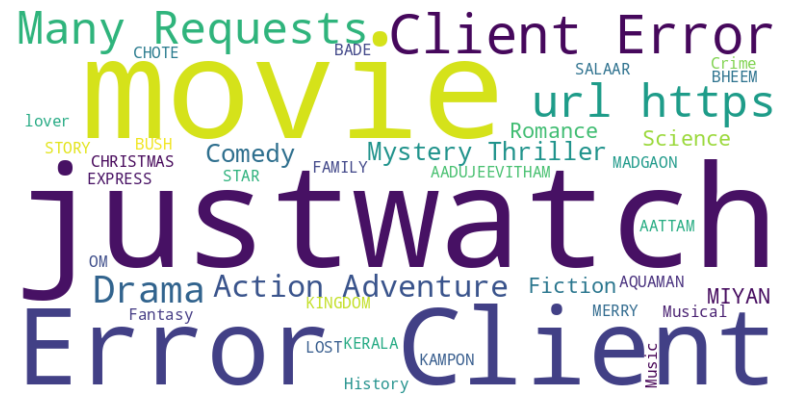

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Assuming 'filtered_df_movies' is a DataFrame and 'Genre' is a column containing lists of genres
# We need to convert the lists of genres into a single string with all genres separated by spaces
all_genres = ' '.join([' '.join(genre_list) if isinstance(genre_list, list) else genre_list for genre_list in filtered_df_movies['Genre']])

# Now you can generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


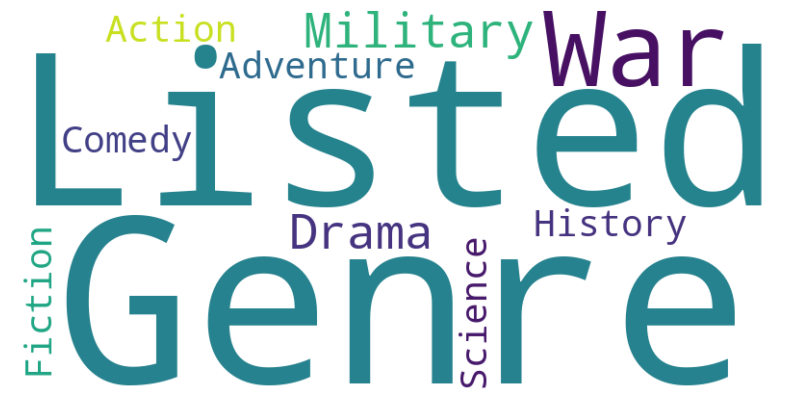

In [ ]:
# Top TV shows Genres
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_genres = ' '.join(filtered_df_tv_shows['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:

# Funtion for Finding  Movies / Tv Shows Predominant Streaming Service

def visualize_streaming_distribution_wordcloud(df):
    # Filter streaming information available
    streaming_platforms = df[df['Streaming Platform'] != 'Not Available for Streaming.']['Streaming Platform']

    # Create a string of streaming platforms
    streaming_text = ' '.join(streaming_platforms)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Streaming Service Distribution - Word Cloud')
    plt.show()

    # Identify the predominant streaming service
    predominant_service = streaming_platforms.mode().iloc[0]
    print(f"The predominant streaming service is: {predominant_service}")

In [ ]:

# Visualizing Movies Predominant Streaming Platform using Word Cloud

visualize_streaming_distribution_wordcloud(filtered_df_movies)

ValueError: We need at least 1 word to plot a word cloud, got 0.

## **Task 3 :- Data Export**

In [ ]:
# Saving Final Movies/Tv Shows dataframe as Final Data in csv format

df_movies.to_csv('Final_Movies_Data.csv', index=False)
df_tv_shows.to_csv('Final_Tv_Shows_Data.csv', index=False)

In [ ]:
# Saving Filtered Movies/Tv Shows dataframe as Filtered Data in csv format

filtered_df_movies.to_csv('Filtered_Movies_Data.csv', index=False)
filtered_df_tv_shows.to_csv('Filtered_Tv_Shows_Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***